## מגישות  
טוהר רחמין וליאור דדון

#### קישור
https://www.census.gov/foreign-trade/statistics/historical/index.html

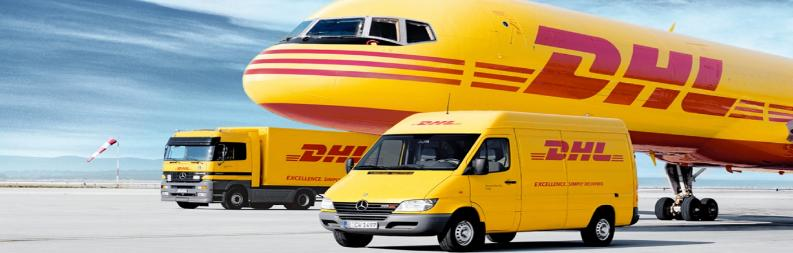

In [1]:
from IPython.display import Image
Image("DHL.jpg")

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('exhibit_history_project (2).csv')
data= data.iloc[:,0:10]
data['month']= data.iloc[:,0]
data['years']= data.iloc[:,0]

In [4]:
data['years']=pd.to_numeric(data['years'], errors='coerce')

In [5]:
data['years']=data['years'].fillna(method='ffill')

In [6]:
data_n=data[:].dropna()

In [7]:
data_n['years']=data_n['years'].astype(int)
data_n

,Unnamed: 0,Balance_Total,Balance_Goods,Balance_Services,Exports_Total,Exports_Goods,Exports_Services,Imports_Total,Imports_Goods,Imports_Services,month,years
2,Jan. - Dec.,39212,-96897,57685,616882,439631,177251,656094,536528,119566,Jan. - Dec.,1992
3,January,2026,-6952,4926,50251,35498,14753,52277,42450,9827,January,1992
4,February,831,-5593,4762,51682,36854,14828,52513,42447,10066,February,1992
5,March,2641,-7355,4714,50294,35711,14583,52935,43066,9869,March,1992
6,April,3109,-8284,5175,50302,35439,14863,53411,43723,9688,April,1992
...,...,...,...,...,...,...,...,...,...,...,...,...
410,February,70642,-89155,18513,188561,130436,58125,259203,219591,39612,February,2021
411,March,75025,-92859,17834,202669,143658,59011,277693,236516,41177,March,2021
412,April,69071,-86873,17802,204704,145088,59615,273775,231961,41814,April,2021
413,May,70995,-89132,18137,206468,145636,60832,277462,234768,42695,May,2021


In [8]:
data_n['Balance_Services']=data_n['Balance_Services'].astype(int)
data_n['Balance_Goods']=data_n['Balance_Goods'].astype(int)
data_n['Balance_Total']=data_n['Balance_Total'].astype(int)
data_n['Exports_Total']=data_n['Exports_Total'].astype(int)
data_n['Exports_Goods']=data_n['Exports_Goods'].astype(int)
data_n['Exports_Services']=data_n['Exports_Services'].astype(int)
data_n['Imports_Total']=data_n['Imports_Total'].astype(int)
data_n['Imports_Goods']=data_n['Imports_Goods'].astype(int)
data_n['Imports_Services']=data_n['Imports_Services'].astype(int)

In [9]:
Data= data_n.loc[data_n.month!='Jan. - Dec.']

# יצוא ויבוא לפי עונות

In [10]:
data_n['month']=data_n['month'].convert_dtypes()

In [11]:
Spring=data_n.loc[(data_n.month=='April')|(data_n.month== 'March') |(data_n.month== 'May')].copy()
Spring['s']='Spring'
Summer=data_n.loc[(data_n.month=='June')|(data_n.month== 'July') |(data_n.month== 'August')].copy()
Summer['s']='summer'
Autumn=data_n.loc[(data_n.month=='Septembe')|(data_n.month== 'October') |(data_n.month== 'November')].copy()
Autumn['s']='Autumn'
Winter=data_n.loc[(data_n.month=='December')|(data_n.month== 'January') |(data_n.month== 'February')].copy()
Winter['s']='winter'
data_n['winter']=Winter[['s']]
data_n['spring']=Spring[['s']]
data_n['summer']=Summer[['s']]
data_n['autumn']=Autumn[['s']]
data_n[['winter','autumn','summer','spring']]

,winter,autumn,summer,spring
2,NaN,NaN,NaN,NaN
3,winter,NaN,NaN,NaN
4,winter,NaN,NaN,NaN
5,NaN,NaN,NaN,Spring
6,NaN,NaN,NaN,Spring
...,...,...,...,...
410,winter,NaN,NaN,NaN
411,NaN,NaN,NaN,Spring
412,NaN,NaN,NaN,Spring
413,NaN,NaN,NaN,Spring


In [12]:
data_n["seasons"]=data_n[['winter']]
data_n["seasons"].fillna(data_n["autumn"], inplace=True)
data_n["seasons"].fillna(data_n["summer"], inplace=True)
data_n["seasons"].fillna(data_n["spring"], inplace=True)

Text(-15.075000000000003, 0.5, '')

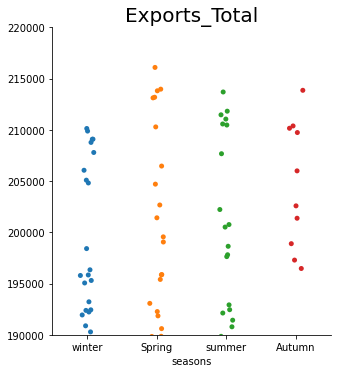

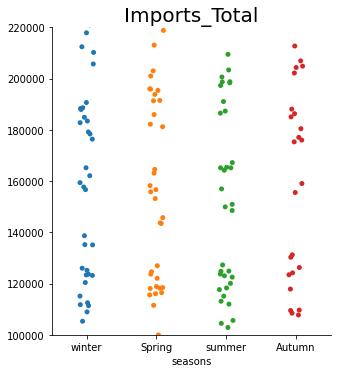

In [13]:
sns.catplot(x="seasons", y='Exports_Total', data=data_n, jitter=0.1)
plt.title('Exports_Total',fontsize=20)
plt.ylim([190000,220000])
plt.ylabel("")
sns.catplot(x="seasons", y='Imports_Total', data=data_n, jitter=0.1)
plt.title('Imports_Total',fontsize=20)
plt.ylim([100000,220000])
plt.ylabel("")

### מסקנה
כמו שניתן לראות העונה בא יש את היצוא הכי גדול היא אביב ואילו הכי נמוכה היא החורף

בנוסף העונות אביב וקיץ היו בעלות היבוא הגדול ביותר אך העונות חורף וסתיו היו הקטנות יות

# רגעי השיא והשפל 


In [14]:
years2020=Data.loc[(data_n.years==2020.0)]
years2001=Data.loc[(data_n.years==2001.0)]

# קורונה

Text(0.5, 1.0, 'Imports Total 2020')

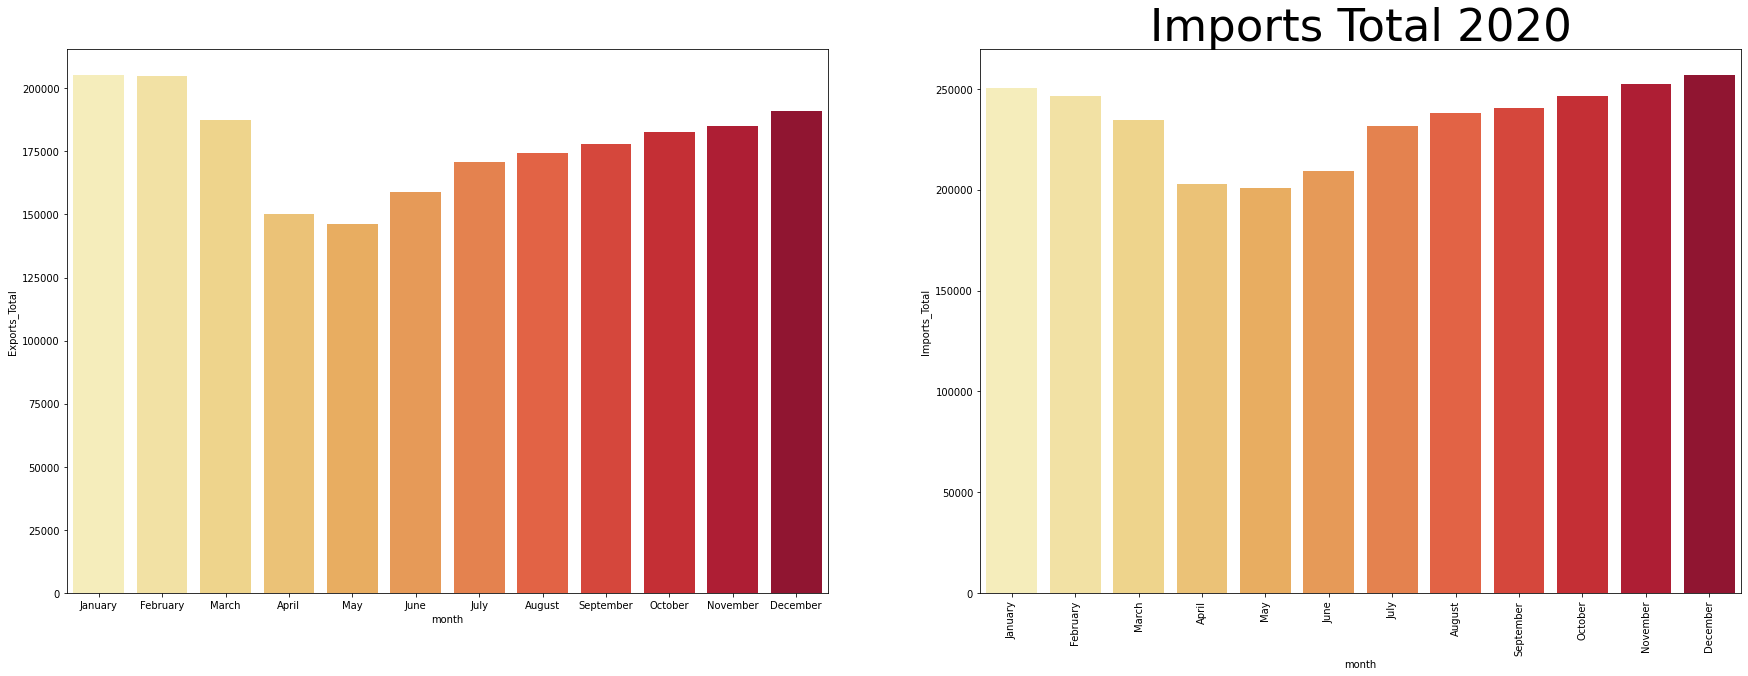

In [15]:
fig, axes = plt.subplots(figsize=(30,10), ncols=2)
sns.barplot(x= 'month', y='Exports_Total', data=years2020, ax = axes[0],palette=("YlOrRd"))
plt.xticks(rotation='vertical')
plt.title('Exports Total 2020',fontsize=35)
sns.barplot(x= 'month', y='Imports_Total', data=years2020, ax = axes[1],palette=("YlOrRd"))
plt.xticks(rotation='vertical')
plt.title('Imports Total 2020',fontsize=45)

## הערה
ניתן לראות שבחודשים מרץ-אפריל-מאי חלה ירידה גם ביבוא וגם ביצוא

# בספטמבר 11

Text(0.5, 1.0, 'Imports Total 2001')

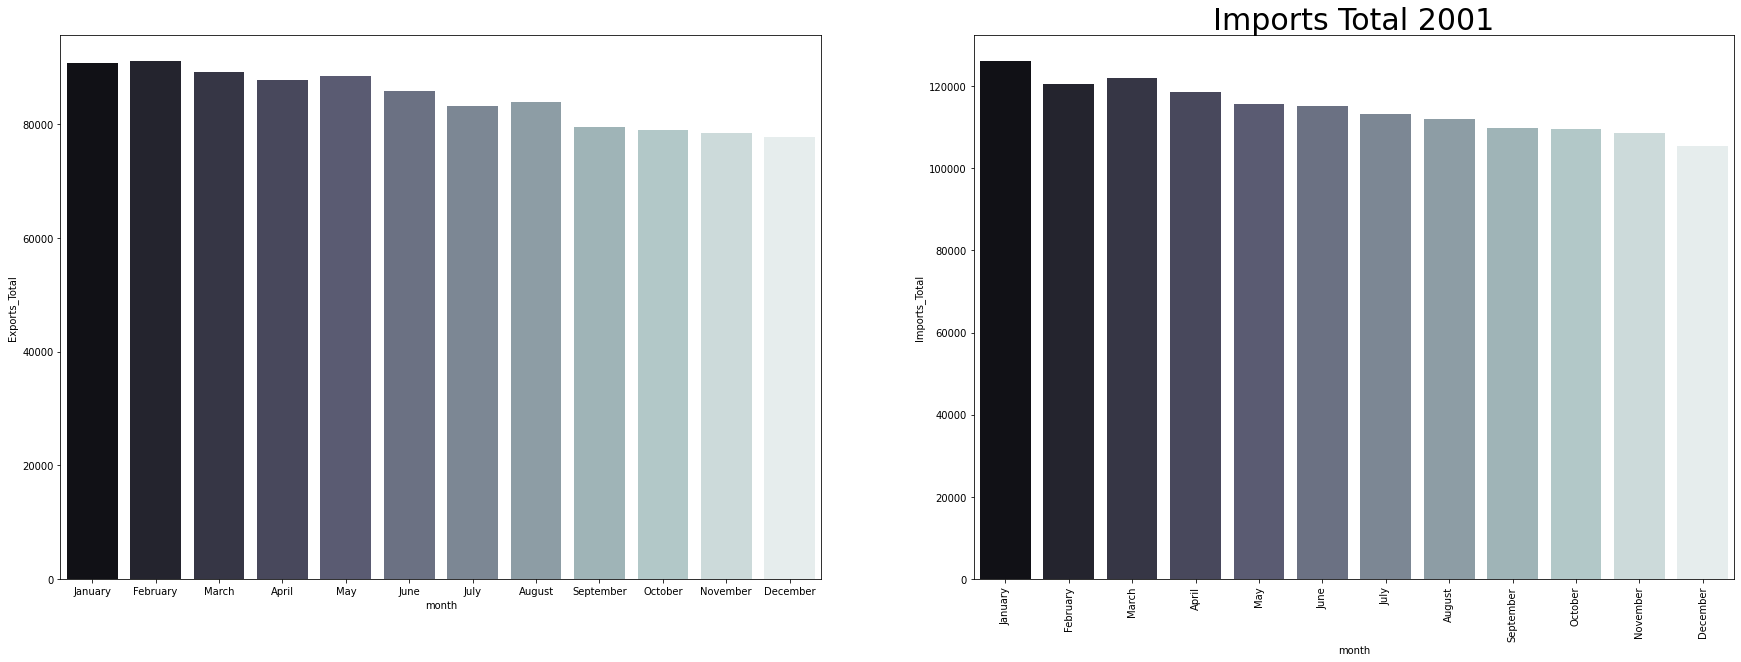

In [16]:
fig, axes = plt.subplots(figsize=(30,10), ncols=2)
sns.barplot(x= 'month', y='Exports_Total', data=years2001, ax = axes[0],palette=("bone"))
plt.xticks(rotation='vertical')
plt.title('Exports Total 2001',fontsize=30)
sns.set_context("poster")
sns.barplot(x= 'month', y='Imports_Total', data=years2001, ax = axes[1],palette=("bone"))
plt.xticks(rotation='vertical')
plt.title('Imports Total 2001',fontsize=30)

## הערה
אפשר לראות כי מחודש ספטמבר חלה ירידה

# Hanjin Shipping פשיטת הרגל של חברת הענק

In [17]:
years_total= data_n.loc[data.month== 'Jan. - Dec.']
years_total=years_total.loc[(years_total.years>2014.0)& (years_total.years<2020.0)]

Text(0.5, 1.0, 'Exports Total 2015-2019')

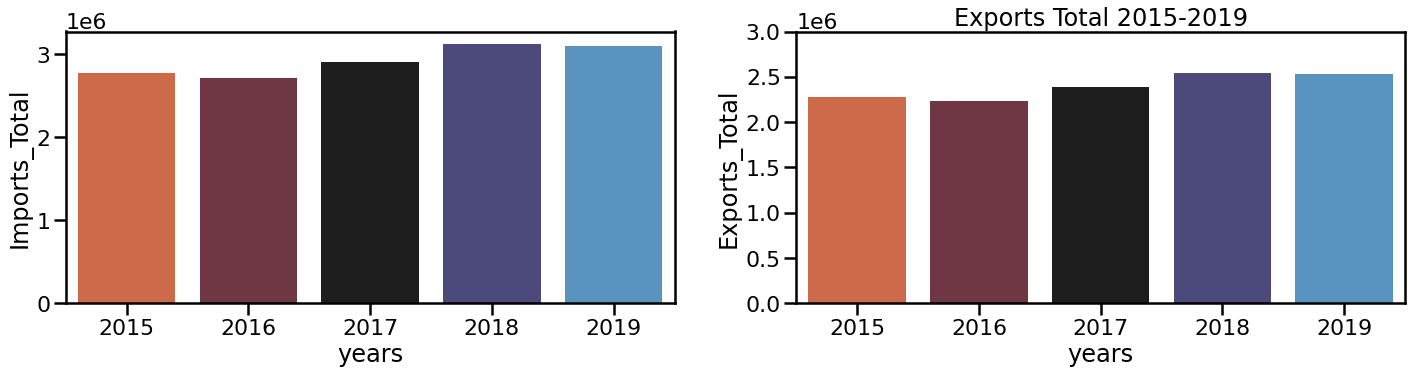

In [18]:
fig, axes = plt.subplots(figsize=(24, 5), ncols=2)
sns.barplot(x= 'years', y='Imports_Total', data=years_total, ax = axes[0],palette=("icefire_r"))
plt.ylim([0,3500000])
plt.title('Imports Total 2015-2019',fontsize=24)
sns.barplot(x= 'years', y='Exports_Total', data=years_total, ax = axes[1],palette=("icefire_r"))
plt.ylim([0,3000000])
plt.title('Exports Total 2015-2019',fontsize=24)

## הערה
ניתן לראות כי בשנים 2017-2018 חלה עליה ביבוא ויבצוא

## מסקנה
בעזרת שלושת האירועים כי הכלכלה העולמית משפיעה על היבוא והיצוא באופן ישיר

# חיזוי המאזן בעזרת ריגרסיה לינארית

In [19]:
balance_f=data_n.loc[:,["Balance_Total","years"]]
predict_balance=balance_f.groupby("years")[["Balance_Total"]].mean()
predict_balance["years"]=range(1992,2022)
sum_xi_yi=0
sum_xi=0
sum_yi=0
sum_xi_2=0
for i in range(1992,2022):
    sum_xi_yi+=(predict_balance.loc[i])*i
    sum_xi+=i
    sum_yi+=predict_balance.loc[i]
    sum_xi_2+=(i**2)
sum_2xi=sum_xi**2
n=len(predict_balance)

In [20]:
b=((n*sum_xi_yi)-(sum_xi*sum_yi))/((n*sum_xi_2)-sum_2xi)

In [21]:
mean_x=sum_xi/n
mean_y=sum_yi/n

In [22]:
a=mean_y-(b*mean_x)

In [23]:
balance_2022=a+(b*2022)

In [24]:
rigras={1992:0,1993:0,1994:0,1995:0,1996:0,1997:0,1998:0,1999:0,2000:0,2001:0,2002:0,2003:0,2004:0,2005:0,2006:0,2007:0,2008:0,2009:0,2010:0,2011:0,2012:0,2013:0,2014:0,2015:0,2016:0,2017:0,2018:0,2019:0,2020:0,2021:0,2022:0}
for j in range(1992,2023):
    rigras[j]=a+(b*j)
r_data=pd.DataFrame(rigras)
rigras_data=r_data.T
rigras_data["years"]=range(1992,2023)

In [25]:
XValues=rigras_data["years"]
YValues=rigras_data["Balance_Total"]
xValues=predict_balance["years"]
yValues=predict_balance["Balance_Total"]

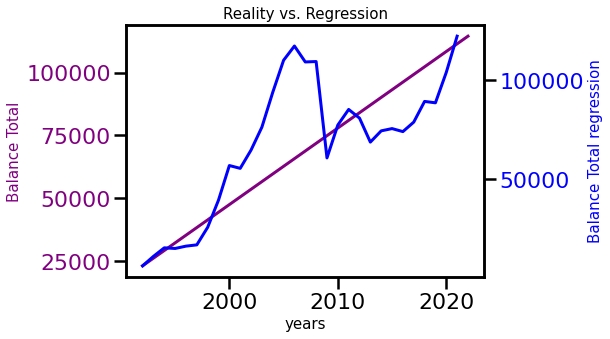

In [44]:
fig, ax1 = plt.subplots(figsize=(9, 5))
ax1.set_xlabel('years',fontsize=15)
ax1.set_ylabel('Balance Total', color="purple",fontsize=15)
ax1.plot(XValues,YValues,color="purple")
ax1.tick_params(axis='y', labelcolor="purple")

ax2 = ax1.twinx()  

ax2.set_ylabel('Balance Total regression', color="blue",fontsize=15)  
ax2.plot(xValues,yValues,color="blue")
ax2.tick_params(axis='y', labelcolor="blue")

fig.tight_layout()  
plt.title("Reality vs. Regression",fontsize=15)
plt.show()

## הערה 
בגרף ניתן לראות את ההפרשים ונקודות החיתוך בין הרגרסיה לנתוני המציאות

## חישוב סטיות

In [27]:
ms_sum=rigras_data[["Balance_Total"]]
ms_sum["Balance_Total_rill"]=predict_balance[["Balance_Total"]]
ms_sum["MSE"]=(ms_sum["Balance_Total"]-ms_sum["Balance_Total_rill"])**2
MSE=(ms_sum["MSE"].sum())/n

In [28]:
ms_sum["MAD"]=abs(ms_sum["Balance_Total"]-ms_sum["Balance_Total_rill"])
MAD=(ms_sum["MAD"].sum())/n
ms_sum=ms_sum.dropna()

In [29]:
devi=ms_sum.copy()
devi["MAD"]=sorted(devi["MAD"])
devi["MSE"]=sorted(devi["MSE"])
devi=devi.loc[:2019,["MAD","MSE"]]


Text(0.5, 1.0, 'MAD')

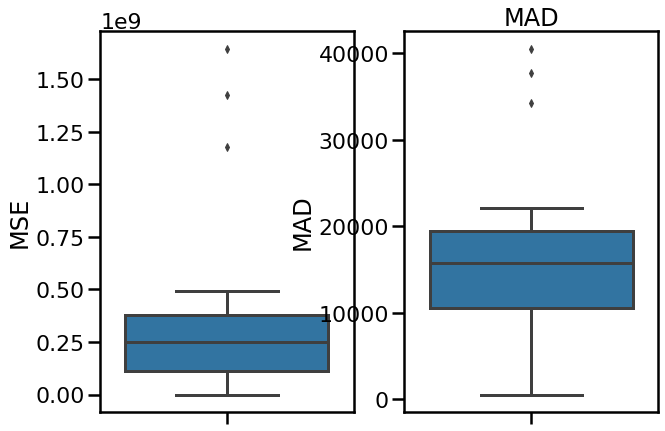

In [30]:
fig, axes = plt.subplots(figsize=(10,7), ncols=2)
sns.boxplot(y="MSE", data=devi , ax = axes[0])
plt.title("MSE",fontsize=24)
sns.boxplot(y="MAD", data=devi,ax = axes[1])
plt.title("MAD",fontsize=24)

## מסקנה
לפי חישובי הרגרסיה ובעזרת הסטיות ניתן לחזות כי בשנת 2022 סכום המאזן יהיה 114501.292813 